In [1]:
import sys
sys.path.insert(0,'../')
from utils import get_ex_results, move_legend
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import numpy as np
import pandas as pd

sns.set()
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
from get_data import get_train_test_data
from tools import add_time
from train import SignatureOrderSelection, SignatureRegression, select_hatm_cv, select_nbasis_cv, BasisRegression
from plot_tensor_heatmap import plot_tensor_heatmap

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
palette = sns.color_palette("colorblind")

# Illustration of the estimation method

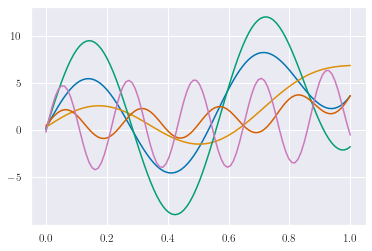

In [5]:
npoints = 100
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth', ntrain=100, nval=10,  Y_type='sig', npoints=npoints, 
                                                 d=5, scale_X=False, seed=16)
palette = sns.color_palette('colorblind')
for j in range(Xtrain.shape[2]):
    plt.plot(np.linspace(0,1,num=npoints),Xtrain[0,:,j], color=palette[j])
plt.savefig('Figures/samples_X_polysinus_independent.pdf', bbox_inches='tight')
plt.show()

In [6]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth', ntrain=10, nval=10,  Y_type='sig', npoints=npoints, d=2, scale_X=False, seed=16)

3


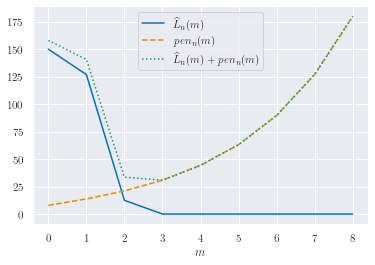

In [7]:
Xtimetrain = add_time(Xtrain)
order_sel = SignatureOrderSelection(2, Kpen=20)
hatm = order_sel.get_hatm(Xtimetrain, Ytrain, plot=True)
print(hatm)
plt.savefig('Figures/illustration_estimation_m.pdf', bbox_inches='tight')

# Estimator convergence

In [8]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('smooth', ntrain=50, nval=10,  Y_type='sig', npoints=npoints, d=2, scale_X=False, seed=16)
Xtimetrain = add_time(Xtrain)
Xtimeval = add_time(Xval)

8


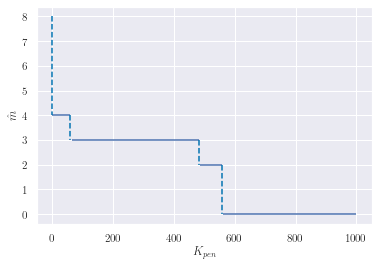

Enter slope heuristic constant Kpen: 100
Hatm 3


In [9]:
order_sel = SignatureOrderSelection(Xtimetrain.shape[2], max_features = 10 ** 4)
print(order_sel.max_k)
Kpen_grid = np.concatenate([[0.], np.linspace(10 ** (-1), 10 **3, num=200)])
hatm = order_sel.get_hatm(Xtimetrain, Ytrain, Kpen_values=Kpen_grid, plot=False, savefig=True)
print("Hatm", hatm)

In [10]:
df = get_ex_results('results/estimator_convergence')
df['hatm'] = df['hatm'].astype(int)

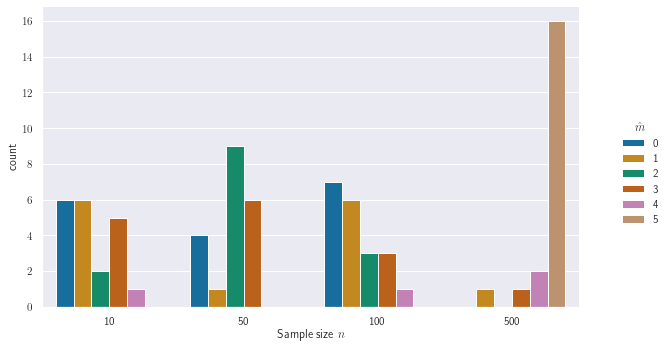

In [11]:
g = sns.catplot(x='ntrain', hue="hatm", data=df, kind="count", palette="colorblind")
g.fig.set_size_inches(10,5)
plt.xlabel(r"Sample size $n$")
g._legend.set_title(r"$\hat{m}$")
plt.savefig('Figures/convergence_hatm.pdf', bbox_inches='tight')
plt.show()

# Dimension study

## For smooth curves

In [12]:
df = get_ex_results('results/dim_study')
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
df = df[df['Y_type'] == 'mean']

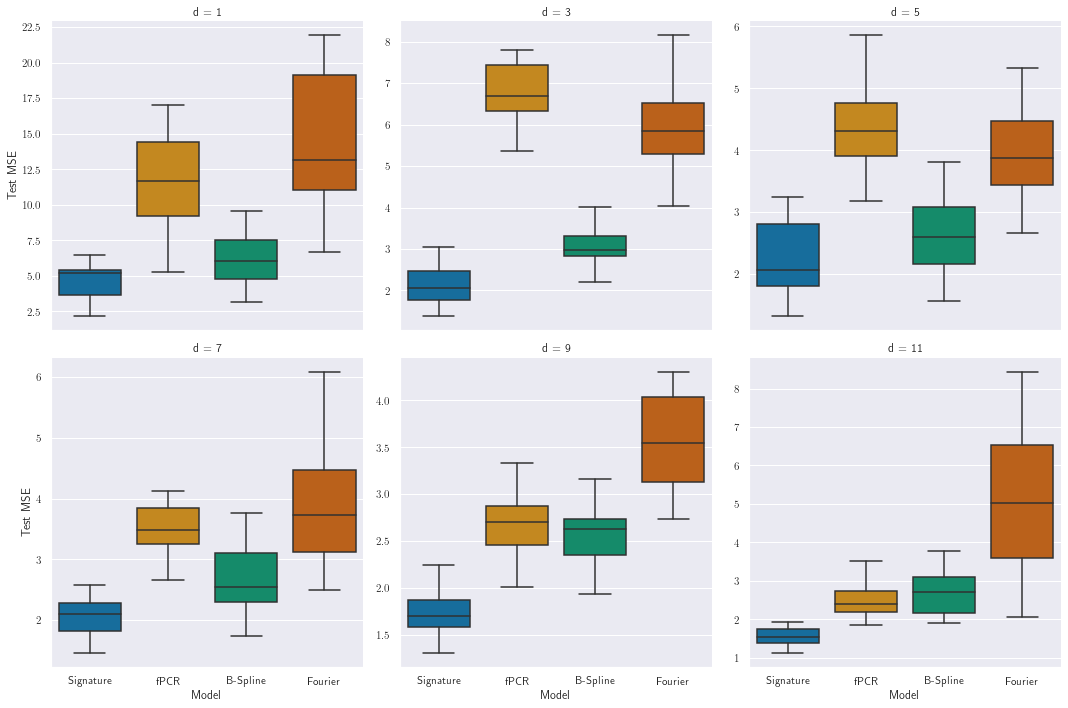

In [13]:
g = sns.catplot(y="val.error", x="regressor", data=df, kind='box', col='d', col_wrap=3,
                 sharey=False, palette="colorblind", showfliers=False)
g.set_axis_labels(r"Model", "Test MSE")
plt.savefig("Figures/dimension_study_independent_sinus.pdf", bbox_inches='tight')
plt.show()

## For Gaussian processes

In [14]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('gp',ntrain=1, nval=1, npoints=100, d=5, scale_X=False)

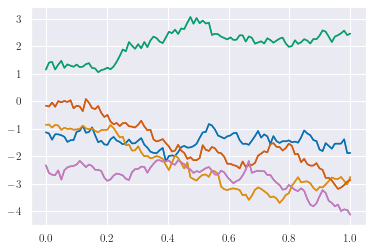

In [15]:
plt.plot(np.linspace(0, 1, num=Xtrain.shape[1]), Xtrain[0,:,:])
palette = sns.color_palette('colorblind')
for j in range(Xtrain.shape[2]):
    plt.plot(np.linspace(0,1,num=100),Xtrain[0,:,j], color=palette[j])
plt.savefig("Figures/samples_gaussian_processes.pdf", bbox_inches='tight')
plt.show()

In [16]:
df = get_ex_results('results/dim_study_gp')
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})

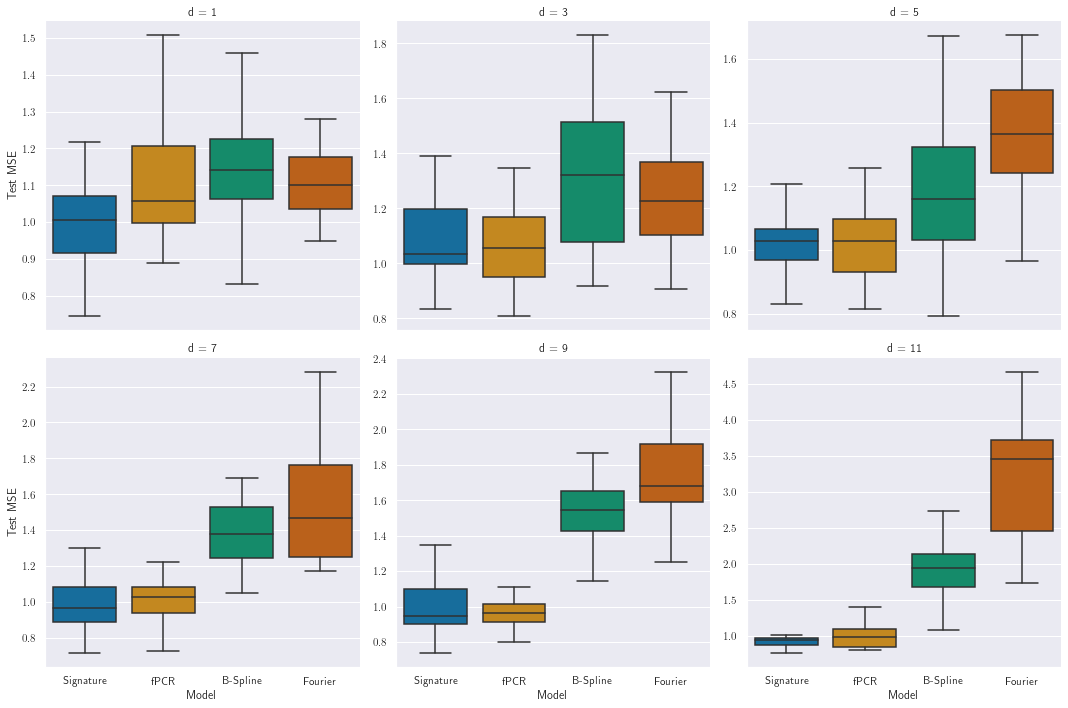

In [17]:
g = sns.catplot(y="val.error", x="regressor", data=df, kind='box', col='d', col_wrap=3,
                 sharey=False, palette="colorblind", showfliers=False)
g.set_axis_labels(r"Model", "Test MSE")
plt.savefig("Figures/dimension_study_gaussian_processes.pdf", bbox_inches='tight')
plt.show()

# Air Quality Data Set

In [18]:
Xtrain, Ytrain, Xval, Yval = get_train_test_data('air_quality', scale_X=True, univariate_air_quality=False)

(6156, 168, 3)


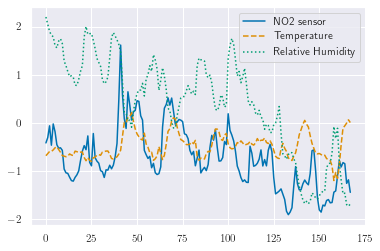

In [19]:
print(Xtrain.shape)
plt.plot(Xtrain[0, :, 0], label='NO2 sensor', color=palette[0])
plt.plot(Xtrain[0, :, 1], label='Temperature',  color=palette[1], linestyle='dashed')
plt.plot(Xtrain[0, :, 2], label='Relative Humidity', color=palette[2], linestyle='dotted')
plt.legend()
plt.savefig('Figures/samples_air_quality.pdf', bbox_inches='tight')
plt.show()

In [20]:
df = get_ex_results('results/air_quality')

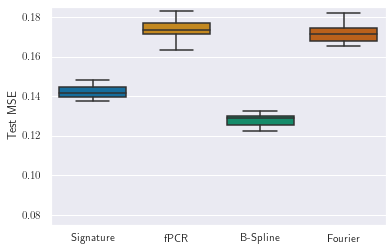

In [21]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
g = sns.boxplot(x="regressor", y="val.error", data=df[df['univariate_air_quality']=='True'], palette="colorblind")

g.set(xlabel="", ylabel="Test MSE", ylim=(0.075, 0.185))
plt.savefig("Figures/air_quality_univariate.pdf", bbox_inches='tight')
plt.show()

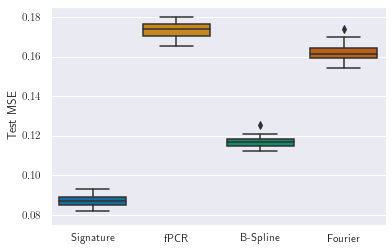

In [22]:
df['regressor'] = df['regressor'].replace({'signature': 'Signature', 'bspline': 'B-Spline', 'fourier':'Fourier', 'fPCA': 'fPCR'})
g = sns.boxplot(x="regressor", y="val.error", data=df[df['univariate_air_quality']=='False'], palette="colorblind")

g.set(xlabel="", ylabel="Test MSE", ylim=(0.075, 0.185))
plt.savefig("Figures/air_quality_multivariate.pdf", bbox_inches='tight')
plt.show()

## Interpretation of the coefficients

In [24]:
Xtimetrain = add_time(Xtrain)
hatm=4
d = Xtimetrain.shape[2]

In [25]:
sig_reg = SignatureRegression(hatm, scaling=False, alpha=1000)
sig_reg.fit(Xtimetrain, Ytrain)

Ridge(fit_intercept=False, normalize=False, solver='svd')

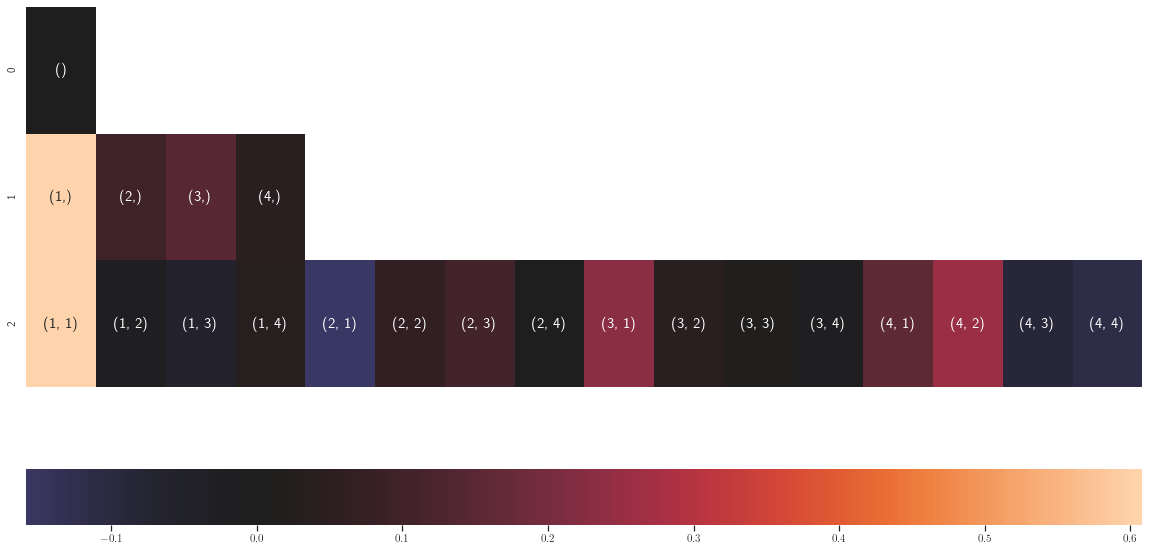

In [26]:
k = 2 #coefficient up to which we want to plot the coefficients
size_coeff = int((d**(k+1)-1)/(d-1))
sig_reg_coeff = np.concatenate([[sig_reg.reg.intercept_],sig_reg.reg.coef_])
coeff = sig_reg_coeff[:size_coeff]
plot_tensor_heatmap(coeff, d, k, label=True, textsize=15)
plt.savefig("Figures/air_quality_coefficients.pdf", bbox_inches='tight')